In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [2]:
avo = pd.read_csv('/Users/jin/Downloads/avocados.csv')

In [3]:
avo.head(6)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  12/27/2015          1.33      64236.62  1036.74   54454.85   
1           1  12/20/2015          1.35      54876.98   674.28   44638.81   
2           2  12/13/2015          0.93     118220.22   794.70  109149.67   
3           3   12/6/2015          1.08      78992.15  1132.00   71976.41   
4           4  11/29/2015          1.28      51039.60   941.48   43838.39   
5           5  11/22/2015          1.26      55979.78  1184.27   48067.99   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany

In [4]:
#Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?

In [20]:
regions=['Indianapolis','Orlando','PhoenixTucson']

In [21]:
avo1= avo['region'].isin(regions)

In [22]:
avo2= avo[avo1].copy()

In [23]:
avo2.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
988           0  12/27/2015          1.04     123096.09  4647.28  69384.73   
989           1  12/20/2015          1.10     116353.68  3702.20  67983.94   
990           2  12/13/2015          1.03     125342.89  4904.51  69984.32   
991           3   12/6/2015          0.92     145740.44  4067.00  89452.99   
992           4  11/29/2015          1.08     108444.41  3079.44  65254.08   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
988  11206.40    37857.68    20644.64    11524.06      5688.98  conventional   
989   9327.71    35339.83    18144.63    12133.67      5061.53  conventional   
990  11398.44    39055.62    21259.82    15580.08      2215.72  conventional   
991  13570.12    38650.33    19365.92    17733.68      1550.73  conventional   
992  10854.59    29256.30    17455.74     9975.21      1825.35  conventional   

     year        region  
988  2015  Indianapolis  
989  2015  Indianapolis  
990  2015  Indianapolis  
991  2015  Indianapolis  
992  2015  Indianapolis

In [24]:
avo2.region.value_counts()

Indianapolis     338
Orlando          338
PhoenixTucson    338
Name: region, dtype: int64

In [25]:
dict={'Orlando':0,'Indianapolis':1,'PhoenixTucson':2}

In [26]:
avo2['region']=avo2.region.replace(dict)

In [30]:
avo2.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
988           0  12/27/2015          1.04     123096.09  4647.28  69384.73   
989           1  12/20/2015          1.10     116353.68  3702.20  67983.94   
990           2  12/13/2015          1.03     125342.89  4904.51  69984.32   
991           3   12/6/2015          0.92     145740.44  4067.00  89452.99   
992           4  11/29/2015          1.08     108444.41  3079.44  65254.08   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
988  11206.40    37857.68    20644.64    11524.06      5688.98  conventional   
989   9327.71    35339.83    18144.63    12133.67      5061.53  conventional   
990  11398.44    39055.62    21259.82    15580.08      2215.72  conventional   
991  13570.12    38650.33    19365.92    17733.68      1550.73  conventional   
992  10854.59    29256.30    17455.74     9975.21      1825.35  conventional   

     year  region  
988  2015       1  
989  2015       1  
990  2015       1  
991  2015       1  
992  2015       1

In [31]:
avo2.region.value_counts()

1    338
0    338
2    338
Name: region, dtype: int64

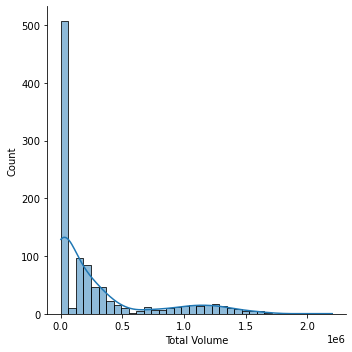

In [32]:
sns.displot(avo2['Total Volume'], kde=True)

In [33]:
avo2['Tvsqrt']=np.sqrt(avo2['Total Volume'])

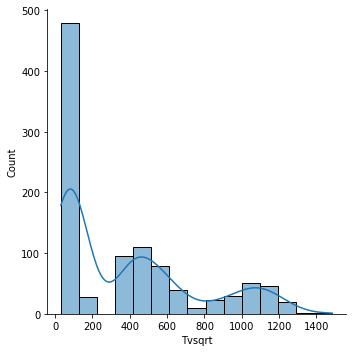

In [35]:
sns.displot(avo2['Tvsqrt'],kde=True)

In [36]:
avo2['Tvlog']=np.log(avo2['Total Volume'])

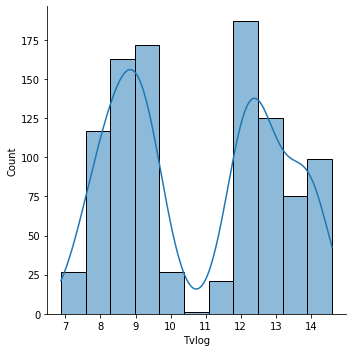

In [37]:
sns.displot(avo2['Tvlog'],kde=True)

In [38]:
scipy.stats.bartlett(avo2['Tvlog'],avo2['region'])

BartlettResult(statistic=883.7919675933716, pvalue=3.275576009474301e-194)

In [41]:
stats.f_oneway(avo['Total Volume'][avo['region']=="PhoenixTucson"],
              avo['Total Volume'][avo['region']=='Orlando'],
              avo['Total Volume'][avo['region']=='Indianapolis'])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

In [42]:
postHoc = MultiComparison(avo2["Tvlog"], avo2["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.4292 0.0253 -0.816 -0.0424   True
     0      2   1.0474  0.001 0.6606  1.4342   True
     1      2   1.4766  0.001 1.0898  1.8634   True
---------------------------------------------------


In [43]:
avo3=avo2[['region','Total Volume']]

In [45]:
avo3.groupby('region').mean()

Total Volume
region               
0       173552.378373
1        89536.661036
2       578826.368343

In [46]:
#Phoenix has the highest volume, orlando being second and indianapolis last 